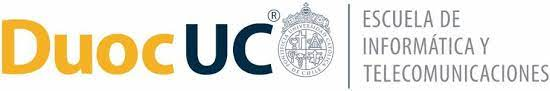

# Evaluación 2: Caso Forma C


Integrantes: 
*   **Cristóbal Cabezas Espinoza**
*   **Jorge López Soto**

Docente: Marco Antonio Japke Adriasola

Sección: DLY0100-003V

## Parte 1. Implementación de Red Feed Fordward Fully Connected (MLP) 


Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

In [97]:
# Importamos librerias
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from keras.optimizers import SGD, Adam
from keras.layers import Flatten
from keras import callbacks

In [56]:
# Cargamos nuestro dataset, el cual lo importamos de la libreria de keras
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Nuestro dataset cuenta con 50000 imágenes, cada una de un tamaño de 32x32. 

In [57]:
# Con esta lista etiquetamos las clases de las imagenes
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

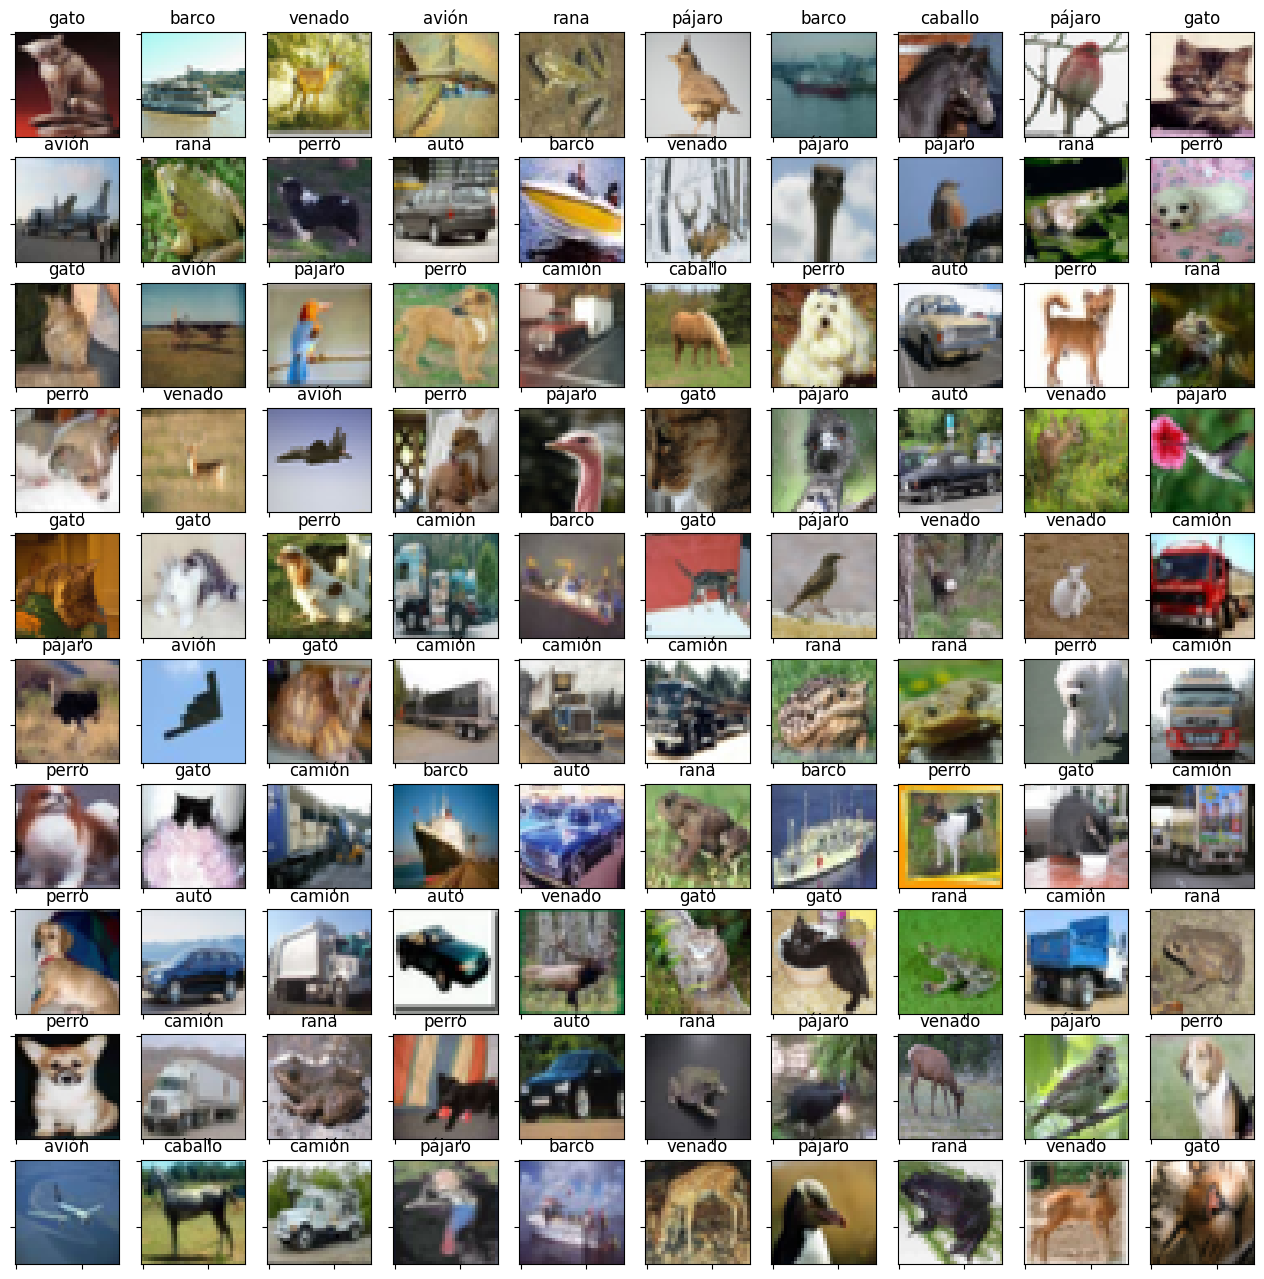

In [58]:
# Mostramos una grilla de ejemplos (al azar)

h = 10 # alto de la grilla
w = 10 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [59]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [60]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [61]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [62]:
# tamaños de capas escondidas

h1 = 512
h2 = 256
h3 = 64

### 1.1 MODELO 1 - **SGD**

#### 1.1.1 *SGD - ReLu*

In [27]:
# nuestra red feed-forward

model_sgd_relu = keras.Sequential()
model_sgd_relu.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_sgd_relu.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu.summary()

/home/cristobal/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu = model_sgd_relu.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5835 - loss: 1.2134 - val_accuracy: 0.5716 - val_loss: 1.2180
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5833 - loss: 1.2134 - val_accuracy: 0.5828 - val_loss: 1.1928
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5865 - loss: 1.1953 - val_accuracy: 0.5855 - val_loss: 1.1877
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5922 - loss: 1.1879 - val_accuracy: 0.5865 - val_loss: 1.1778
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5874 - loss: 1.1895 - val_accuracy: 0.5857 - val_loss: 1.1872
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5977 - loss: 1.1802 - val_accuracy: 0.6000 - val_loss: 1.1503
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6003 - loss: 1.1588 - val_accuracy: 0.5958 - val_loss: 1.1516
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5982 - loss: 1.1616 - val_accu

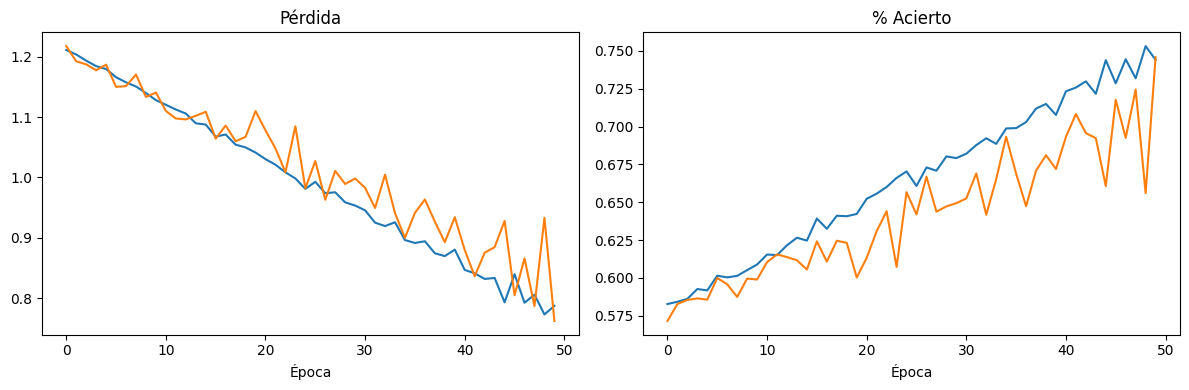

In [31]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu.history['accuracy'])
plt.plot(h_sgd_relu.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu.history['loss'])
plt.plot(h_sgd_relu.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 1.1.2 *SGD - Tanh*

In [32]:
# nuestra red feed-forward

model_sgd_tanh = keras.Sequential()
model_sgd_tanh.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh.add(keras.layers.Dense(h2, activation='tanh', name='tercera_capa'))
model_sgd_tanh.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh.summary()

/home/cristobal/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh = model_sgd_tanh.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.1905 - loss: 2.1923 - val_accuracy: 0.2772 - val_loss: 1.9941
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3023 - loss: 1.9624 - val_accuracy: 0.3213 - val_loss: 1.9002
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3396 - loss: 1.8855 - val_accuracy: 0.3443 - val_loss: 1.8483
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3562 - loss: 1.8395 - val_accuracy: 0.3563 - val_loss: 1.8122
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.3662 - loss: 1.8059 - val_accuracy: 0.3677 - val_loss: 1.7835
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3777 - loss: 1.7787 - val_accuracy: 0.3775 - val_loss: 1.7589
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3896 - loss: 1.7555 - val_accuracy: 0.3858 - val_loss: 1.7370
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4000 - loss: 1.7350 - val_accu

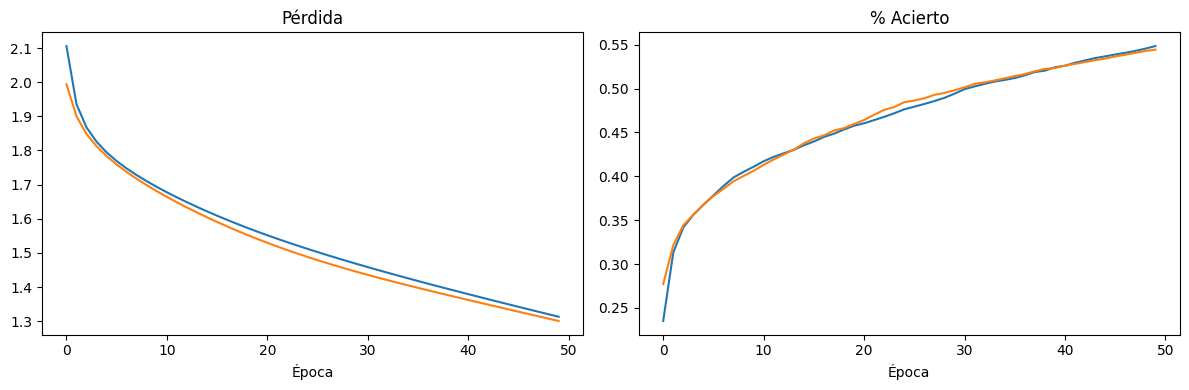

In [34]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh.history['accuracy'])
plt.plot(h_sgd_tanh.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh.history['loss'])
plt.plot(h_sgd_tanh.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 1.1.3 *SGD - Sigmoid*

In [53]:
# nuestra red feed-forward

model_sgd_tanh = keras.Sequential()
model_sgd_tanh.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_tanh.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_sgd_tanh.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_sgd_tanh.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
sgd=SGD(learning_rate=0.01)
model_sgd_tanh.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

h_sgd_tanh = model_sgd_tanh.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.0982 - loss: 2.3398 - val_accuracy: 0.1020 - val_loss: 2.3037
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1042 - loss: 2.3046 - val_accuracy: 0.1019 - val_loss: 2.3030
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1066 - loss: 2.3039 - val_accuracy: 0.1024 - val_loss: 2.3024
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1086 - loss: 2.3032 - val_accuracy: 0.1050 - val_loss: 2.3017
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1112 - loss: 2.3026 - val_accuracy: 0.1085 - val_loss: 2.3010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1146 - loss: 2.3019 - val_accuracy: 0.1142 - val_loss: 2.3004
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1175 - loss: 2.3012 - val_accuracy: 0.1210 - val_loss: 2.2997
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1197 - loss: 2.3005 - val_accu

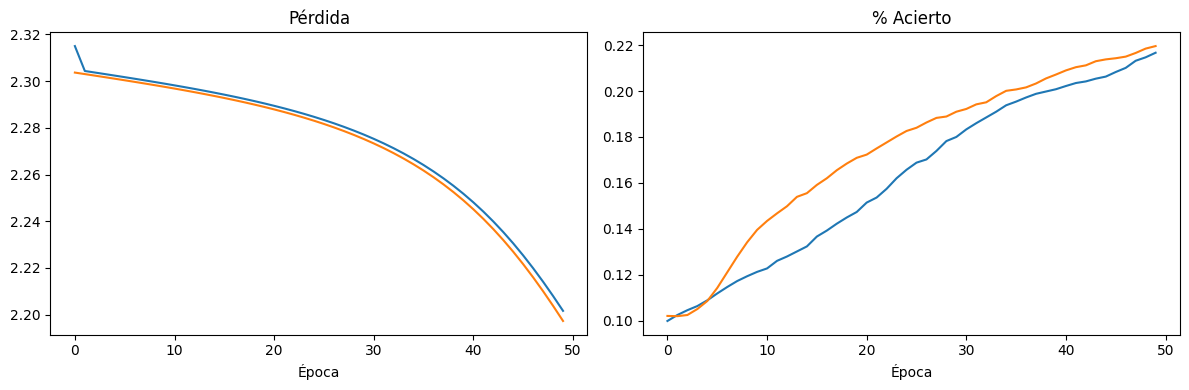

In [55]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh.history['accuracy'])
plt.plot(h_sgd_tanh.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh.history['loss'])
plt.plot(h_sgd_tanh.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

### 1.2 MODELO 2 - **ADAM**

#### *1.2.1 ADAM - ReLu*

In [56]:
# nuestra red feed-forward

model_adam_relu = keras.Sequential()
model_adam_relu.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_adam_relu.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu = model_adam_relu.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.1764 - loss: 2.3781 - val_accuracy: 0.3160 - val_loss: 1.8989
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3051 - loss: 1.9103 - val_accuracy: 0.3731 - val_loss: 1.7725
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.3489 - loss: 1.8135 - val_accuracy: 0.3690 - val_loss: 1.7446
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3799 - loss: 1.7406 - val_accuracy: 0.3800 - val_loss: 1.7454
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3922 - loss: 1.6865 - val_accuracy: 0.4014 - val_loss: 1.6817
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.4062 - loss: 1.6530 - val_accuracy: 0.4094 - val_loss: 1.6405
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4240 - loss: 1.6023 - val_accuracy: 0.4188 - val_loss: 1.6128
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4351 - loss: 1.5699 - val_accu

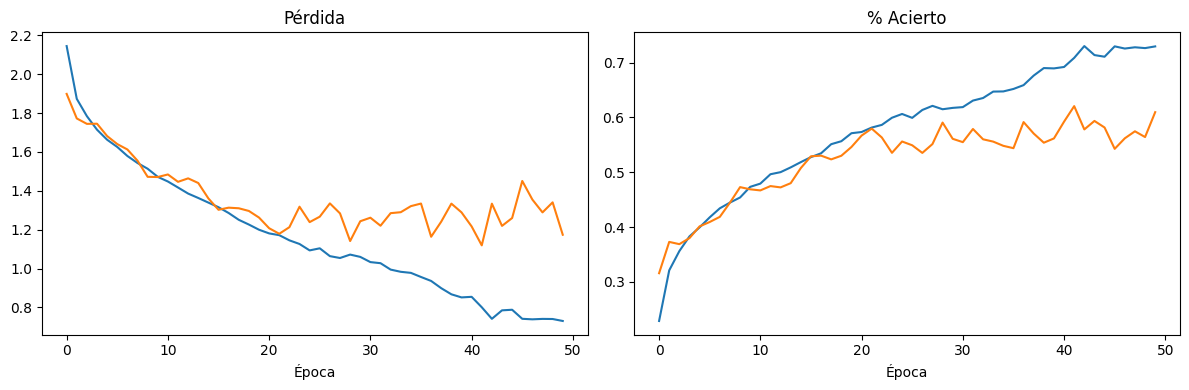

In [58]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu.history['accuracy'])
plt.plot(h_adam_relu.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu.history['loss'])
plt.plot(h_adam_relu.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 1.2.2 *ADAM - Tanh*

In [59]:
# nuestra red feed-forward

model_adam_tanh = keras.Sequential()
model_adam_tanh.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_adam_tanh.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_adam_tanh.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh = model_adam_tanh.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.1408 - loss: 2.4910 - val_accuracy: 0.2644 - val_loss: 2.0221
Epoch 2/50
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2035 - loss: 2.1135

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.2477 - loss: 2.0163 - val_accuracy: 0.2977 - val_loss: 1.9090
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2877 - loss: 1.9403 - val_accuracy: 0.3108 - val_loss: 1.8615
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3117 - loss: 1.8785 - val_accuracy: 0.3453 - val_loss: 1.7905
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3304 - loss: 1.8307 - val_accuracy: 0.3605 - val_loss: 1.7708
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3403 - loss: 1.7964 - val_accuracy: 0.3451 - val_loss: 1.7841
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3397 - loss: 1.7897 - val_accuracy: 0.3671 - val_loss: 1.7301
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3562 - loss: 1.7675 - val_accuracy: 0.3794 - val_loss: 1.7229
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3698 - loss: 1.7308 - val_accuracy: 0.381

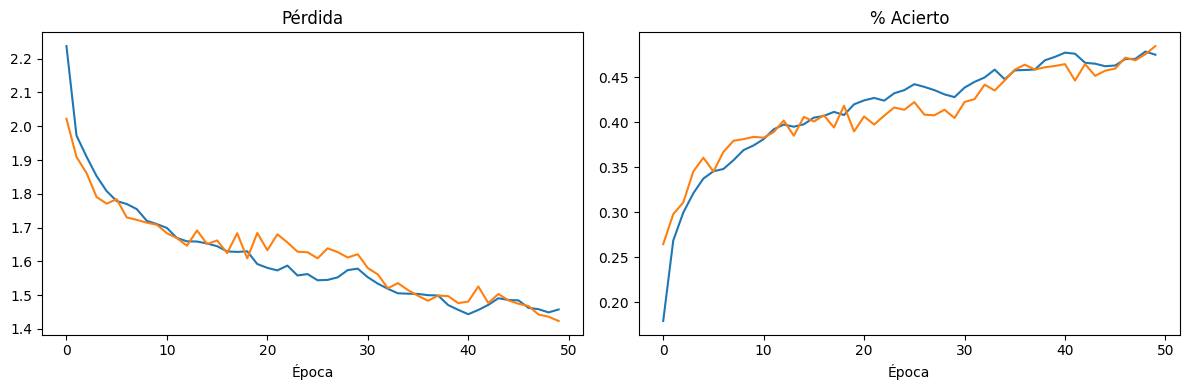

In [61]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh.history['accuracy'])
plt.plot(h_adam_tanh.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh.history['loss'])
plt.plot(h_adam_tanh.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 1.2.3 *ADAM - Sigmoid*

In [62]:
# nuestra red feed-forward

model_adam_sigmoid = keras.Sequential()
model_adam_sigmoid.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_adam_sigmoid.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_adam_sigmoid.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid = model_adam_sigmoid.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.1259 - loss: 2.2928 - val_accuracy: 0.2536 - val_loss: 1.9975
Epoch 2/50
 21/100 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2513 - loss: 2.0282

100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2664 - loss: 1.9887 - val_accuracy: 0.3019 - val_loss: 1.8933
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3046 - loss: 1.9100 - val_accuracy: 0.3305 - val_loss: 1.8256
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3397 - loss: 1.8400 - val_accuracy: 0.3572 - val_loss: 1.7562
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3645 - loss: 1.7741 - val_accuracy: 0.3772 - val_loss: 1.7135
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3791 - loss: 1.7285 - val_accuracy: 0.3861 - val_loss: 1.7032
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3918 - loss: 1.6980 - val_accuracy: 0.3928 - val_loss: 1.6826
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3988 - loss: 1.6660 - val_accuracy: 0.3869 - val_loss: 1.7062
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4073 - loss: 1.6385 - val_accuracy: 0.396

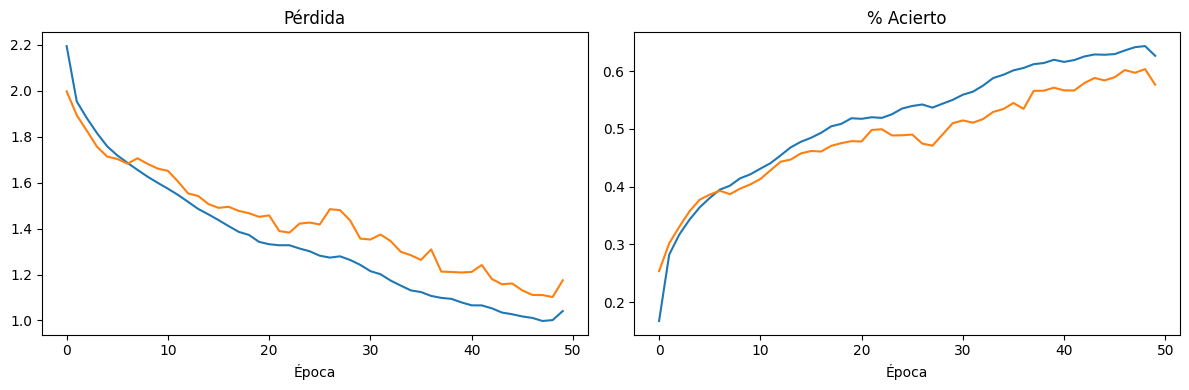

In [64]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid.history['accuracy'])
plt.plot(h_adam_sigmoid.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid.history['loss'])
plt.plot(h_adam_sigmoid.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

### 1.3 MODELO 4 - **RMsProp**

#### 1.3.1 *RMsProp - ReLu*

#### *1.3.2 RMsProp - Tanh*

#### 1.3.3 *RMsProp - Sigmoid*

### 1.4 **Conclusiones**

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ __ capas ocultas }& {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida. 
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

## Parte 2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto. 

## Parte 3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items. 
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no. 

### 3.1 MODELO 1 - SGD + Dropout

In [38]:
# nuestra red feed-forward

model_sgd_relu_dropout = keras.Sequential()
model_sgd_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.3))
model_sgd_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_dropout.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [43]:
h_model_sgd_relu_dropout = model_sgd_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.2446 - loss: 2.1365 - val_accuracy: 0.3424 - val_loss: 1.8720
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.2641 - loss: 1.9830 - val_accuracy: 0.3334 - val_loss: 1.8839
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.2717 - loss: 1.9521 - val_accuracy: 0.3616 - val_loss: 1.8425
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.2856 - loss: 1.9296 - val_accuracy: 0.3512 - val_loss: 1.8419
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.2954 - loss: 1.9023 - val_accuracy: 0.3214 - val_loss: 1.8909
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.2951 - loss: 1.9088 - val_accuracy: 0.3576 - val_loss: 1.8504
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.3019 - loss: 1.8893 - val_accuracy: 0.3665 - val_loss: 1.8523
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.3007 - loss: 1.8871 - 

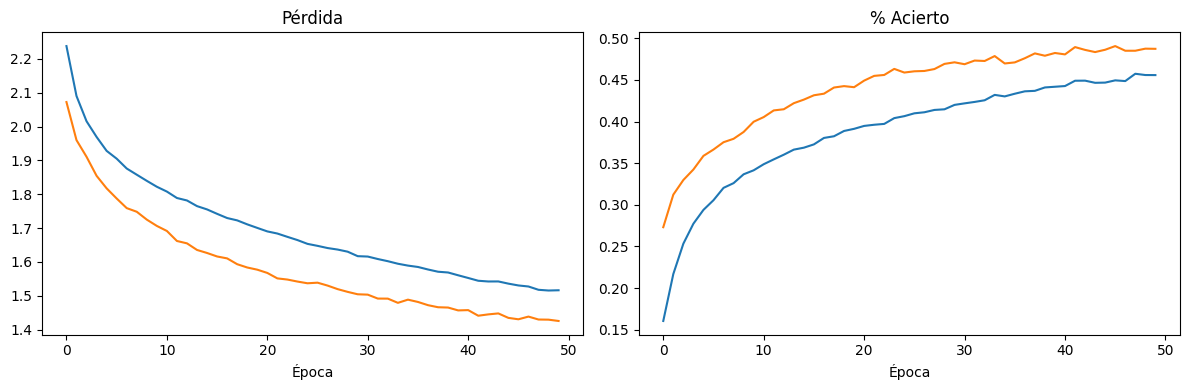

In [41]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_relu_dropout.history['accuracy'])
plt.plot(h_model_sgd_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_relu_dropout.history['loss'])
plt.plot(h_model_sgd_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

### 3.2 MODELO 2 - ADAM + EarlyStopping

In [93]:
# nuestra red feed-forward

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model_adam_relu_earlystopping = keras.Sequential()
model_adam_relu_earlystopping.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_earlystopping.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_earlystopping.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_adam_relu_earlystopping.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_earlystopping.summary()

/home/cristobal/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model_adam_relu_earlystopping.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [95]:
h_adam_relu_earlystopping = model_adam_relu_earlystopping.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test),
        callbacks=[es]
)

Epoch 1/50


/home/cristobal/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)

In [100]:
from tensorflow.keras import layers, regularizers

np.random.seed(30)
tf.random.set_seed(30)

modelo5 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(530, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

modelo5.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, Y_test)
)

Epoch 1/20


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)

Justificar y hacer análisis aquí.

## Parte 4. Optimizadores y Normalización 

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar. 
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida. 

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Otro* } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ __ capas } & \text { __ epocas} & {} & {} & {} & {} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

*Especificar el nombre del optimizador

Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.

## Parte 5. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

In [66]:
#####################################################################
#Programar aquí

#####################################################################

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Analizar aquí las diferencias entre ambas arquitecturas y modelos construídos.

## Parte 6. Detallar la segunda problemática del caso planteado: Redes Recurrentes Parte 1 

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon. 

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso. 

In [67]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Escribir análisis aquí.

## Parte 7.  Detallar la tercera problemática del caso planteado: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.
 

In [68]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.5. Mejor resultado con Recurrente Twitter }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Ingresar análisis de lo realizado aquí, detallando el ajuste realizado, las técnicas utilizadas, funciones, optimizadores, normalización, etc. Fundamentar cómo fue que alcanzaron el máximo Accuracy y disminuyeron el Loss.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para EducaDL, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


**IMPORTANTE:** Para efectos del ET, se deben ajustar sistemáticamente los hiperparámetros del modelo que están construyendo, independiente de los ajustes que se realizan en cada actividad para aprender el uso específico y puntual de los diferentes hiperparámetros. El modelo final que presenten en el ET, debe considerar la mejor combinación de hiperparámetros y sus ajustes revisados en el transcurso del desarrollo de la asignatura.